In [3]:
from scipy import misc
import tensorflow as tf
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from PIL import Image

(28, 28)
4


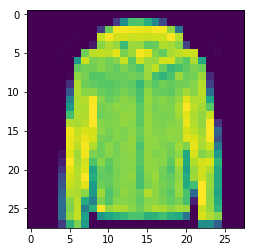

(28, 28)
0


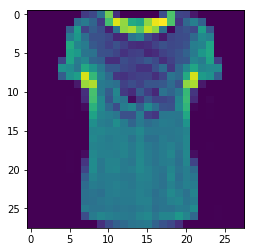

(28, 28)
7


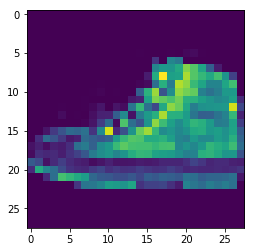

(28, 28)
9


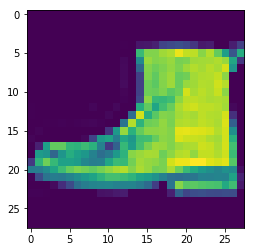

In [16]:

fileNameQue = tf.train.string_input_producer(["tfrecord/test.tfrecords"])
reader = tf.TFRecordReader()
key,value = reader.read(fileNameQue)
features = tf.parse_single_example(value,features={ 'lab': tf.FixedLenFeature([], tf.int64),
                                           'img' : tf.FixedLenFeature([], tf.string)})

image = tf.decode_raw(features["img"], tf.float32)
image=tf.reshape(image,[28,28])
# label=tf.decode_raw(features["lab"],tf.int64)
label=features['lab']
label = tf.cast(label, tf.int32)
init = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(init)

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    for i in range(4):
        img, lab = sess.run([image, label])
        print(img.shape)
        print(lab)

#         plt.figure(figsize=(60,1))
        plt.imshow(img)
        plt.show()
        
        img*=255
        img = np.array(img, dtype='uint8')


        result.save('./test_image/'+str(i) +'_'+str(lab)+ '.png', 'png')

    coord.request_stop()
    coord.join(threads)